In [159]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/Users/wangchenghang/Desktop/nus_semester_2/QF5208/stockprices(2021).csv')

In [3]:
data.shape

(252, 504)

In [4]:
data.head(5)

,Date,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,...,WTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2021-01-04,171.869995,118.040001,226.660004,129.410004,202.720001,182.149994,84.709999,43.959999,52.759998,...,203.699997,106.900002,65.660004,142.429993,99.690002,105.820000,378.130005,153.160004,42.930000,163.589996
1,2021-01-05,171.580002,118.669998,227.759995,131.009995,211.630005,183.639999,87.000000,43.980000,52.180000,...,202.000000,110.190002,65.019997,144.229996,99.570000,105.830002,380.570007,155.809998,43.610001,164.729996
2,2021-01-06,174.190002,123.059998,233.250000,126.599998,211.029999,193.860001,89.800003,44.400002,50.520000,...,203.699997,110.849998,66.459999,141.220001,103.769997,106.410004,394.820007,160.250000,48.509998,167.149994
3,2021-01-07,169.720001,121.660004,234.020004,130.919998,212.710007,194.229996,90.220001,44.959999,49.959999,...,205.250000,109.750000,65.160004,149.710007,108.480003,105.599998,409.100006,159.300003,49.990002,167.000000
4,2021-01-08,166.619995,121.779999,238.490005,132.050003,209.899994,194.259995,91.080002,45.060001,51.080002,...,203.639999,109.029999,65.760002,147.990005,107.379997,107.150002,405.470001,158.949997,48.720001,168.110001


### (a)
Consider a portfolio consisting of the stocks in the first 30 columns (Dow Jones).
Use the principal component analysis to construct the eigen-portfolios. Plot the
eigen-portfolios corresponding to the first 10 principle components.

In [117]:
X = data.iloc[:,1:31].pct_change()

In [118]:
X = X.drop([0])
X.fillna(0)

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
1,-0.001687,0.005337,0.004853,0.012364,0.043952,0.008180,0.027033,0.000455,-0.010993,0.004277,...,0.000965,0.008066,0.006385,0.005492,-0.008257,-0.013448,-0.004588,-0.014925,-0.005797,-0.005323
2,0.015212,0.036993,0.024104,-0.033662,-0.002835,0.055652,0.032184,0.009550,-0.031813,0.003811,...,-0.025929,0.007930,0.010526,-0.024242,0.033970,0.041966,0.012120,-0.008811,0.045432,0.006244
3,-0.025662,-0.011377,0.003301,0.034123,0.007961,0.001909,0.004677,0.012613,-0.011085,-0.003015,...,0.028457,0.018265,-0.009346,0.008466,-0.000216,0.016033,-0.012818,0.005597,0.051824,-0.000068
4,-0.018265,0.000986,0.019101,0.008631,-0.013211,0.000154,0.009532,0.002224,0.022418,0.000616,...,0.006093,0.009659,-0.000432,0.018626,0.004170,-0.004493,-0.012472,0.007670,-0.001105,-0.000136
5,-0.008522,-0.005912,-0.003858,-0.023249,-0.014817,-0.002059,0.005709,0.006658,-0.017228,0.002238,...,-0.009699,0.004783,-0.006773,-0.017069,-0.015897,-0.007265,-0.005882,-0.011882,0.055076,0.004501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.009887,0.001218,0.006167,0.022975,-0.005142,0.000873,0.020445,0.018304,0.007386,-0.005403,...,0.023186,0.011529,0.011680,0.020384,0.008988,0.008317,0.000000,0.004663,0.004952,0.009105
248,0.005320,0.000122,0.002665,-0.005767,0.014569,0.001163,-0.001936,0.001734,0.003922,0.015707,...,-0.003504,-0.006922,0.005371,-0.011034,0.006921,0.006887,0.000759,0.001930,0.013799,0.014351
249,0.004335,-0.003528,0.008106,0.000502,-0.011983,0.003436,-0.005145,0.006768,0.001189,-0.002126,...,0.002051,0.014181,0.008290,-0.003562,0.002419,0.005249,-0.006829,0.000550,0.015944,-0.000490
250,-0.004316,0.002014,-0.004965,-0.006578,-0.004665,-0.006029,-0.004409,-0.005316,-0.002884,0.006844,...,-0.007691,-0.007643,-0.008649,0.003104,-0.004381,-0.002275,-0.002101,-0.001375,-0.004976,0.003223


In [119]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [131]:
X.shape

(251, 30)

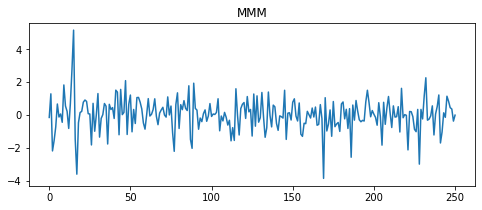

In [93]:
plt.figure(figsize=(8, 3))
plt.title('MMM')
mmm = [X[i][0] for i in range(X.shape[0])]
plt.plot(range(X.shape[0]),mmm)
plt.grid = True
plt.show()

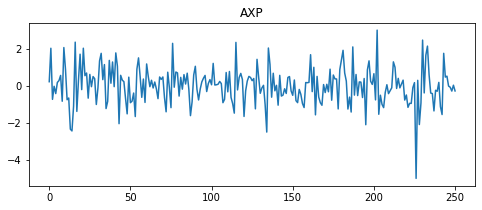

In [94]:
plt.figure(figsize=(8, 3))
plt.title('AXP')
axp = [X[i][1] for i in range(X.shape[0])]
plt.plot(range(X.shape[0]),axp)
plt.grid = True
plt.show()

In [177]:
class DimensionValueError(ValueError):
    """定义异常类"""
    pass


class PCA(object):
    """定义PCA类"""

    def __init__(self, x, n_components=None):
        """x的数据结构应为ndarray"""
        self.x = x
        self.dimension = x.shape[1]

        if n_components and n_components >= self.dimension:
            raise DimensionValueError("n_components error")

        self.n_components = n_components

    def cov(self):
        """求x的协方差矩阵"""
        x_T = np.transpose(self.x)  # 矩阵转秩
        x_cov = np.cov(x_T)  # 协方差矩阵
        return x_cov

    def get_feature(self):
        """求协方差矩阵C的特征值和特征向量"""
        x_cov = self.cov()
        a, b = np.linalg.eig(x_cov)
        m = a.shape[0]
        c = np.hstack((a.reshape((m, 1)), b.T))
        c_df = pd.DataFrame(c)
        c_df.columns = ['eig_value'] + [str(i) for i in range(1, 31)]
        c_df_sort = c_df.sort_values(by='eig_value', ascending=False)
        return c_df_sort

    def explained_variance_(self):
        c_df_sort = self.get_feature()
        return c_df_sort.values[:, 0]

    def explained_variance_ratio_(self):
        explained_variance_ = self.explained_variance_()
        explained_variance_sum_ = sum(self.explained_variance_())
        explained_variance_ratio_ = explained_variance_[
            0:self.n_components]/explained_variance_sum_
        return explained_variance_ratio_

    def reduce_dimension(self):
        """指定维度降维和根据方差贡献率自动降维"""
        c_df_sort = self.get_feature()
        varience = self.explained_variance_()

        if self.n_components:  # 指定降维维度
            p = c_df_sort.values[0:self.n_components, 1:]
#             y = np.dot(p, np.transpose(self.x))              #矩阵叉乘
            return p

        variance_sum = sum(varience)  # 利用方差贡献度自动选择降维维度
        variance_radio = varience / varience_sum

        variance_contribution = 0
        for R in range(self.dimension):
            variance_contribution += variance_radio[R]  # 前R个方差贡献度之和
            if variance_contribution >= 0.99:
                break

        p = c_df_sort.values[0:R+1, 1:]  # 取前R个特征向量
        y = np.dot(p, np.transpose(self.x))  # 矩阵叉乘
        return np.transpose(y)


if __name__ == '__main__':
    pca = PCA(X, n_components=10)
    explained_variance_ratio_ = pca.explained_variance_ratio_()
    print(pca.explained_variance_())
    y = pca.reduce_dimension()

[9.24447374 3.12783977 2.47319753 1.32926004 1.2182153  1.08858351
 0.96465167 0.81503526 0.7967785  0.75304268 0.7373461  0.67195702
 0.65534733 0.59105956 0.57616404 0.54044305 0.52153468 0.49961066
 0.43592587 0.42494101 0.37235057 0.35805744 0.33314561 0.27841617
 0.26912061 0.2501239  0.2351822  0.21011602 0.2006856  0.14739451]


<BarContainer object of 10 artists>

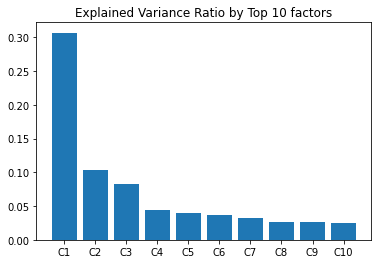

In [178]:
plt.figure(figsize=(6, 4))
plt.title('Explained Variance Ratio by Top 10 factors')
plt.xticks(range(0,10),['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
plt.bar(range(len(explained_variance_ratio_)), explained_variance_ratio_, color=['tab:blue'])

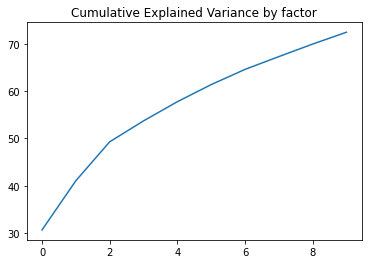

In [179]:
plt.figure(figsize=(6, 4))
plt.title('Cumulative Explained Variance by factor')
cumulative_explained_variance = [sum(explained_variance_ratio_[:i])*100 for i in range(1,len(explained_variance_ratio_)+1)]
plt.plot(range(len(explained_variance_ratio_)),cumulative_explained_variance)
plt.show()

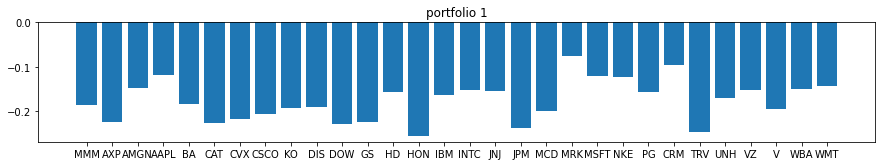

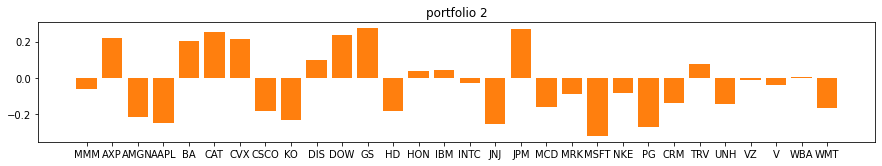

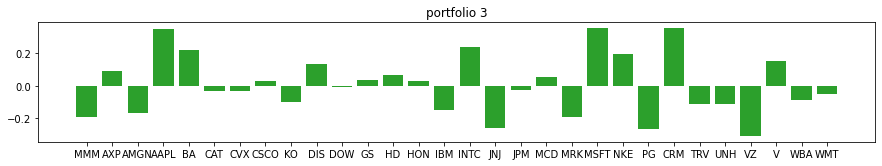

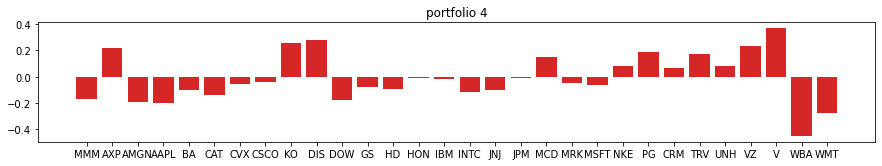

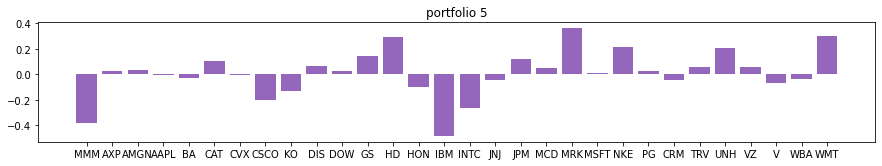

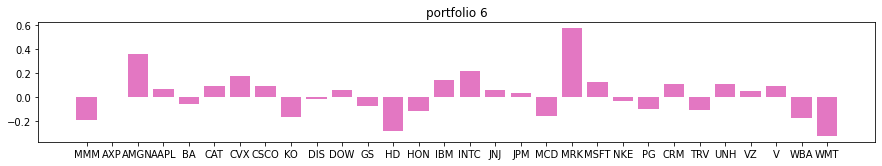

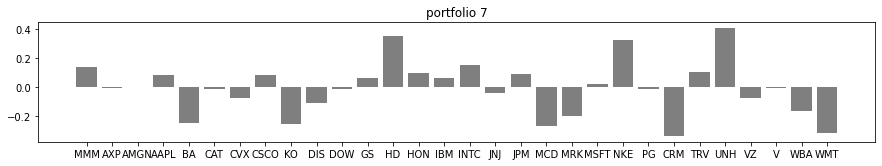

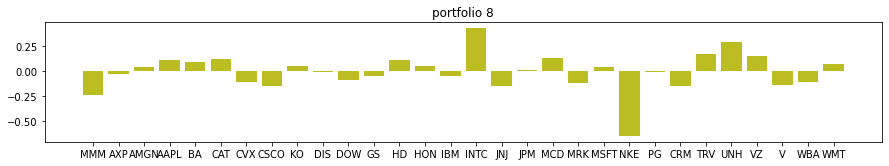

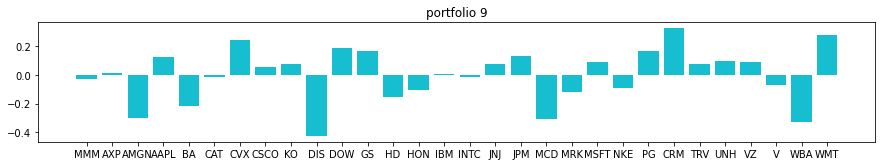

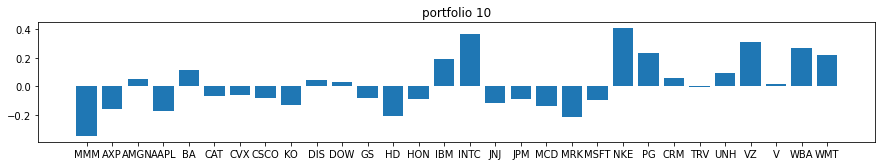

In [169]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan','tab:blue']
for i in range(len(y)):
    plt.figure(figsize=(15, 2.2))
    plt.title('portfolio %s' % (i+1))  
    plt.xticks(range(30),['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT'])
    plt.bar(range(len(y[i])), y[i], color=colors[i])
    plt.show()

In [ ]:
## using sklearn

In [163]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X)
# print(pca.explained_variance_ratio_)
# print(pca.explained_variance_)
# cp = pca.components_

[0.30692144 0.10384594 0.08211147 0.04413214 0.0404454  0.03614155
 0.03202695 0.0270596  0.02645347 0.02500142]
[9.24447374 3.12783977 2.47319753 1.32926004 1.2182153  1.08858351
 0.96465167 0.81503526 0.7967785  0.75304268]


<BarContainer object of 10 artists>

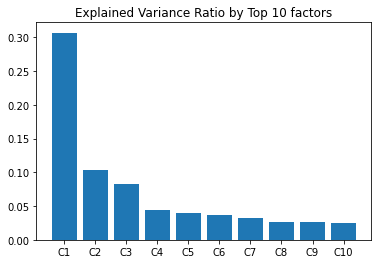

In [164]:
# plt.figure(figsize=(6, 4))
# plt.title('Explained Variance Ratio by Top 10 factors')
# plt.xticks(range(0,10),['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
# plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color=['tab:blue'])

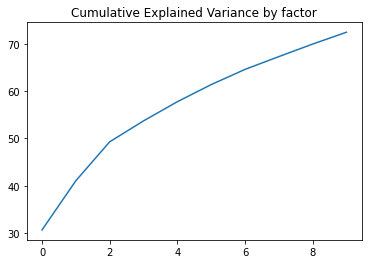

In [73]:
# plt.figure(figsize=(6, 4))
# plt.title('Cumulative Explained Variance by factor')
# cumulative_explained_variance = [sum(pca.explained_variance_ratio_[:i])*100 for i in range(1,len(pca.explained_variance_ratio_)+1)]
# plt.plot(range(len(pca.explained_variance_ratio_)),cumulative_explained_variance)
# plt.show()

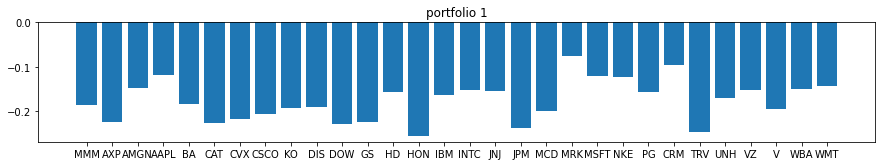

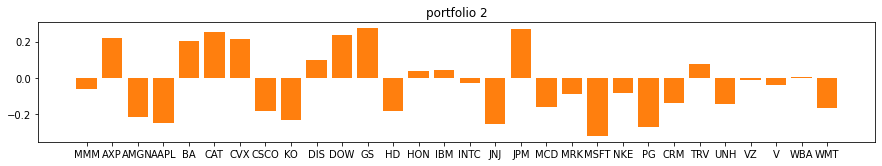

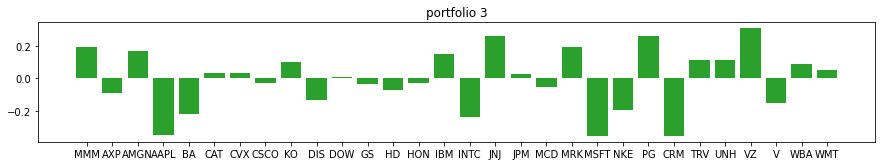

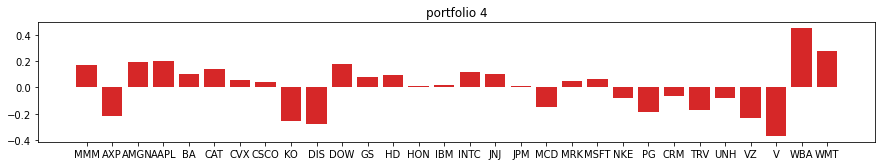

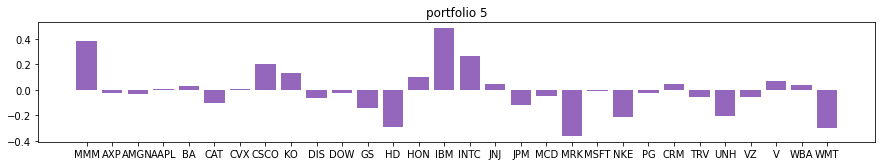

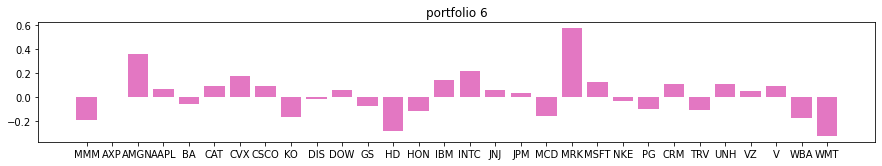

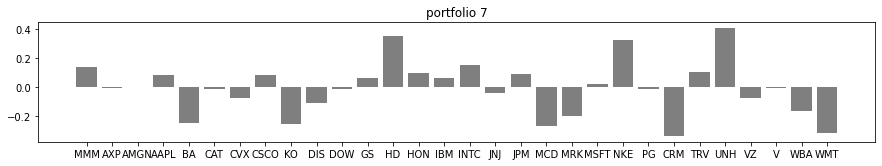

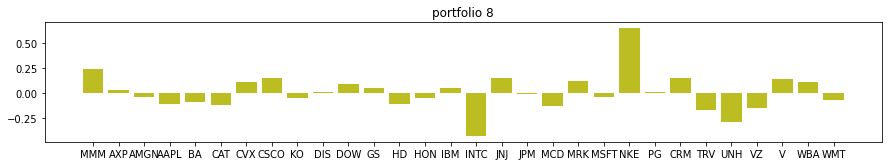

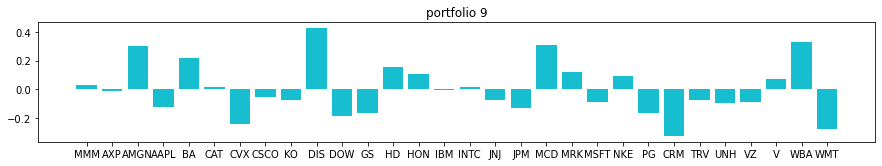

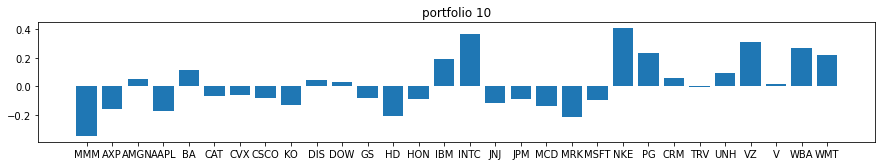

In [36]:
# import matplotlib.pyplot as plt
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
#          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan','tab:blue']
# for i in range(len(cp)):
#     plt.figure(figsize=(15, 2.2))
#     plt.title('portfolio %s' % (i+1))  
#     plt.xticks(range(30s),['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
#        'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
#        'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT'])
#     plt.bar(range(len(cp[i])), cp[i], color=colors[i])
#     plt.show()

### (b)
Let p denote the daily percentage change of the stock price $p = \frac{S_{i+1}-S_i}{S_i}$
, where $S_i$ is the stock price in the i-th day. Define the annual return $r$ and volatility $\sigma$
as $$r = mean(p) ∗ 252 $$
$$\sigma = std(p) ∗ \sqrt{252}$$
where mean(p) and std(p) are the mean and the standard deviation of p, respectively.
Use the K-means model to separate the 503 stocks into K clusters using r and
σ as the variables, where K = 6, 8, 10. Show the results on the plane with the
annual return and volatility being the two coordinate axis.

For each value of K, compute the in-cluster variance:
$$
\sigma_{K}^2= \sum_{i=1}^K\sigma_i^2
$$
where $\sigma_i^2$
is the variance of the data in the i-th cluster.

In [6]:
Y = data.iloc[:,1:]

In [7]:
P = Y.pct_change()
P = P.loc[1:]
P.head(5)

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,WTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
1,-0.001687,0.005337,0.004853,0.012364,0.043952,0.008180,0.027033,0.000455,-0.010993,0.004277,...,-0.008346,0.030776,-0.009747,0.012638,-0.001204,0.000095,0.006453,0.017302,0.015840,0.006969
2,0.015212,0.036993,0.024104,-0.033662,-0.002835,0.055652,0.032184,0.009550,-0.031813,0.003811,...,0.008416,0.005990,0.022147,-0.020869,0.042181,0.005481,0.037444,0.028496,0.112359,0.014691
3,-0.025662,-0.011377,0.003301,0.034123,0.007961,0.001909,0.004677,0.012613,-0.011085,-0.003015,...,0.007609,-0.009923,-0.019561,0.060119,0.045389,-0.007612,0.036168,-0.005928,0.030509,-0.000897
4,-0.018265,0.000986,0.019101,0.008631,-0.013211,0.000154,0.009532,0.002224,0.022418,0.000616,...,-0.007844,-0.006560,0.009208,-0.011489,-0.010140,0.014678,-0.008873,-0.002197,-0.025405,0.006647
5,-0.008522,-0.005912,-0.003858,-0.023249,-0.014817,-0.002059,0.005709,0.006658,-0.017228,0.002238,...,-0.021656,-0.009172,-0.020681,0.020880,-0.012665,0.004853,0.020519,0.000315,0.023604,0.007614


In [8]:
r = pd.DataFrame(P.mean()*252,columns=['r'])
sigma = pd.DataFrame(P.std()*np.sqrt(252),columns=['sigma'])
info = pd.concat([r, sigma], axis=1)
info.head(5)

,r,sigma
MMM,0.050562,0.187225
AXP,0.366866,0.279356
AMGN,0.012651,0.200169
AAPL,0.349005,0.250198
BA,0.055642,0.355995


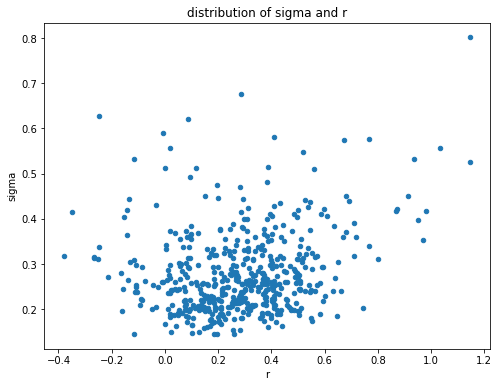

In [12]:
plt.figure(figsize=(8, 6))
plt.title('distribution of sigma and r')
plt.xlabel('r')
plt.ylabel('sigma')
plt.scatter(info['r'],info['sigma'],s=20)
plt.show()

In [18]:
info_list = [[r,s] for [r,s] in zip(info['r'],info['sigma'])]

the in-cluster variance when k = 6 is 0.020112
the in-cluster variance when k = 8 is 0.019372
the in-cluster variance when k = 10 is 0.018140


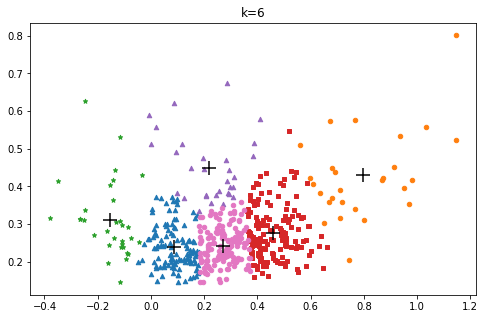

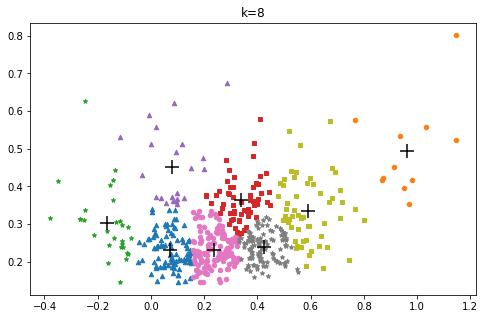

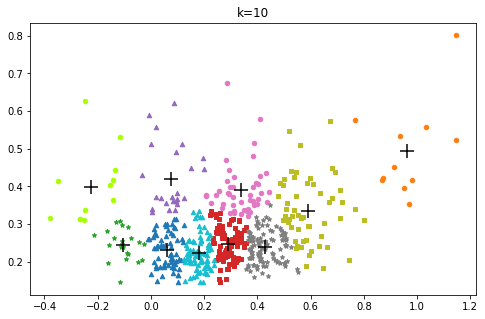

In [185]:
class K_Means(object):
    # k是分组数；tolerance‘中心点误差’；max_iter是迭代次数
    def __init__(self, k=2, tolerance=0.000001, max_iter=1000):
        self.k_ = k
        self.tolerance_ = tolerance
        self.max_iter_ = max_iter

    def fit(self, data):
        self.centers_ = {}
        for i in range(self.k_):
            self.centers_[i] = data[i]

        for i in range(self.max_iter_):
            self.clf_ = {}
            for i in range(self.k_):
                self.clf_[i] = []
            for feature in data:
                distances = []
                for center in self.centers_:
                    distances.append(np.linalg.norm(
                        feature - self.centers_[center]))
                classification = distances.index(min(distances))
                self.clf_[classification].append(feature)

            prev_centers = dict(self.centers_)
            for c in self.clf_:
                self.centers_[c] = np.average(self.clf_[c], axis=0)

            optimized = True
            for center in self.centers_:
                org_centers = prev_centers[center]
                cur_centers = self.centers_[center]
                if np.sum((cur_centers - org_centers) / org_centers * 100.0) > self.tolerance_:
                    optimized = False
            if optimized:
                break


if __name__ == '__main__':
    x = np.array(info_list)
    for cluster_num in [6,8,10]:
        k_means = K_Means(k=cluster_num)
        k_means.fit(x)
        color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
                      'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'xkcd:electric lime']
        marker_list = ['^', 'o', '*', 's', '^', 'o', '*', 's', '^', 'o']
        fig, ax = plt.subplots(figsize=(8, 5))
        i = -1
        in_clu_var = 0
        for cat in k_means.clf_:
            i += 1
            dist = []
            for point in k_means.clf_[cat]:
                dist.append(np.linalg.norm(point - k_means.centers_[i]))
                ax.set_title('k=%d' %(cluster_num), fontsize=12)
                ax.scatter(point[0], point[1], s=20,
                           c=color_list[i], marker=marker_list[i])
            in_clu_var += np.var(dist)    
        print('the in-cluster variance when k = %d is %f' %(cluster_num,in_clu_var))   
        for center in k_means.centers_:
            ax.scatter(k_means.centers_[center][0], k_means.centers_[center][1], s=200,
                       c='black', marker='+', alpha=1)


In [186]:
def getXY(temp_list):
    X = []
    Y = []
    for i in temp_list:
        X.append(info.iloc[i, 0])
        Y.append(info.iloc[i, 1])
    return np.array(X), np.array(Y)


def showCluster(k, label_pred, centroids):
    a = pd.DataFrame(label_pred, columns=['pred'])
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_title('k=%d' % k, fontsize=12)
    temp = [a[a['pred'] == cent].index.tolist() for cent in range(k)]
    for cent, c, marker in zip(range(k), ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
                                          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'xkcd:electric lime'], ['^', 'o', '*', 's', '^', 'o', '*', 's', '^', 'o']):
        X, Y = getXY(temp[cent])
        ax.scatter(X, Y, s=20, c=c, marker=marker)
    for center in centroids:
        ax.scatter(center[0], center[1], s=200,
                   c='black', marker='+', alpha=1)
    ax.set_xlabel('r')
    ax.set_ylabel('sigma')
    
def cal_in_cluster_var(k,label_pred,centroids):
    in_clu_var = 0
    a = pd.DataFrame(label_pred, columns=['pred'])
    temp = [a[a['pred'] == cent].index.tolist() for cent in range(k)]
    for i in range(k):
        X, Y = getXY(temp[i])
        center_x = centroids[i][0]
        center_y = centroids[i][1]
        dist = [np.sqrt((x-center_x)**2 +(y-center_y)**2) for x,y in zip(X,Y)]
        in_clu_var+= np.var(dist)
    return in_clu_var

the in-cluster variance when k = 6 is 0.020133
the in-cluster variance when k = 8 is 0.019753
the in-cluster variance when k = 10 is 0.020198


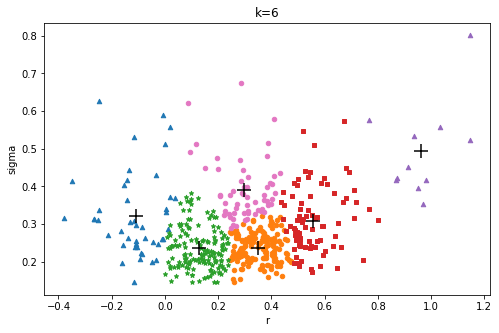

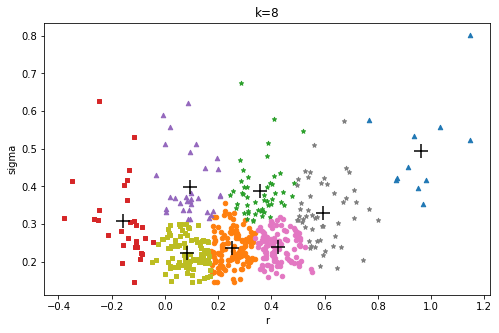

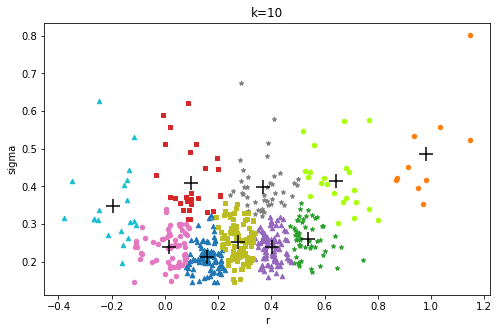

In [187]:
for i in [6,8,10]:
    km = KMeans(n_clusters=i).fit(info)
    label_pred = km.labels_ 
    centroids = km.cluster_centers_ 
    print('the in-cluster variance when k = %d is %f' %(i,cal_in_cluster_var(i,label_pred,centroids)))
    showCluster(i,label_pred,centroids)